# 4장. 일별(Daily) 기준이 아닌 데이터 처리

## 월별 데이터 사용(Using monthly data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('/content/drive/MyDrive/Book7/data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']

In [ ]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp6fl74cb/q4fbh31i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp6fl74cb/igyjtje6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7735', 'data', 'file=/tmp/tmpp6fl74cb/q4fbh31i.json', 'init=/tmp/tmpp6fl74cb/igyjtje6.json', 'output', 'file=/tmp/tmpp6fl74cb/prophet_model80lju3gf/prophet_model-20250706113522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:35:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:35:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


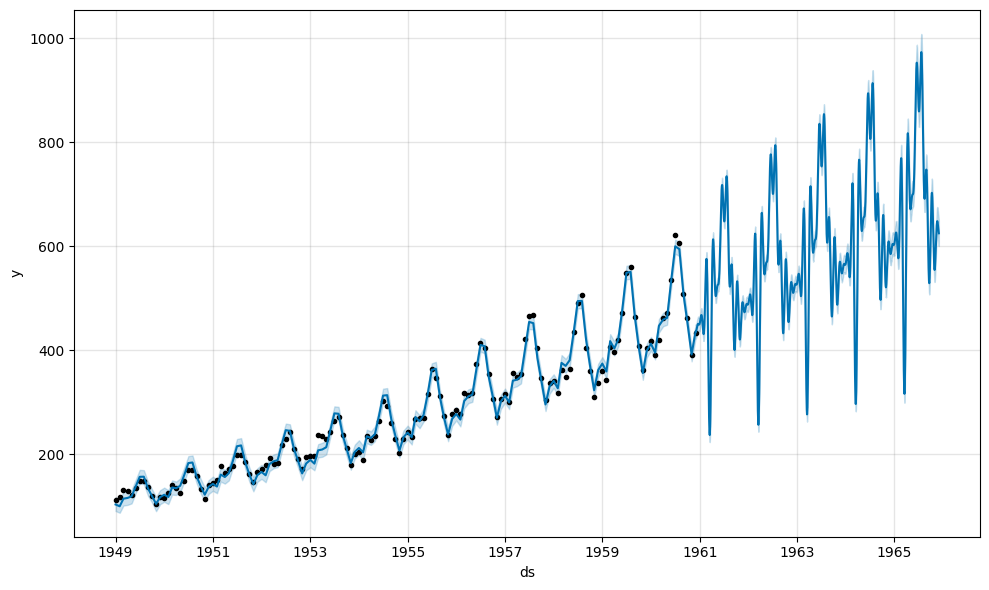

In [ ]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365 * 5)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp6fl74cb/isr7_xvr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp6fl74cb/p793v_3c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71008', 'data', 'file=/tmp/tmpp6fl74cb/isr7_xvr.json', 'init=/tmp/tmpp6fl74cb/p793v_3c.json', 'output', 'file=/tmp/tmpp6fl74cb/prophet_model2oodtmxz/prophet_model-20250706113533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:35:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:35:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


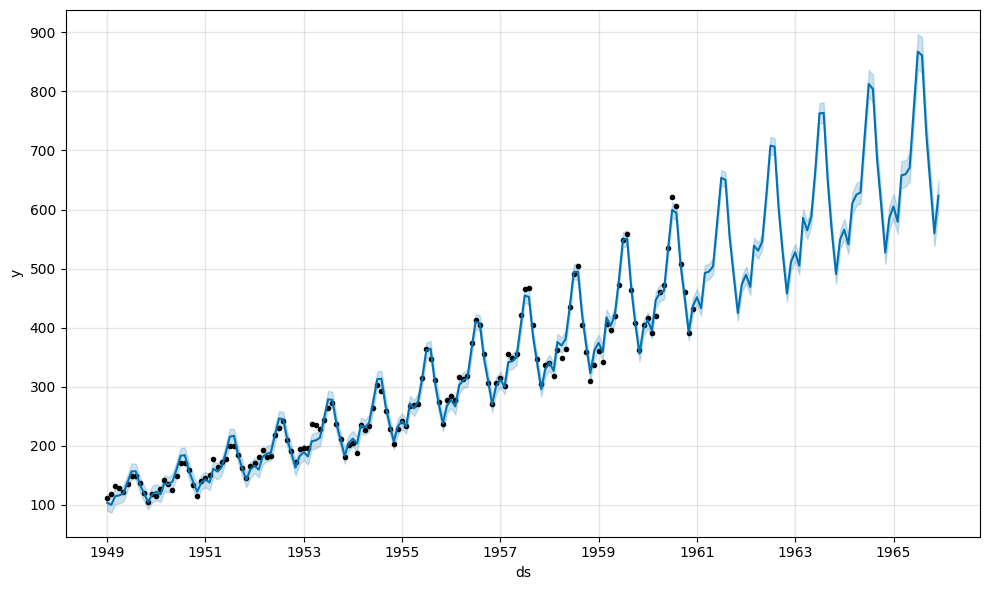

In [ ]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 5, freq='MS')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

## 하루보다 짧은 주기의(sub-daily) 데이터 사용

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Book7/data/divvy_hourly.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

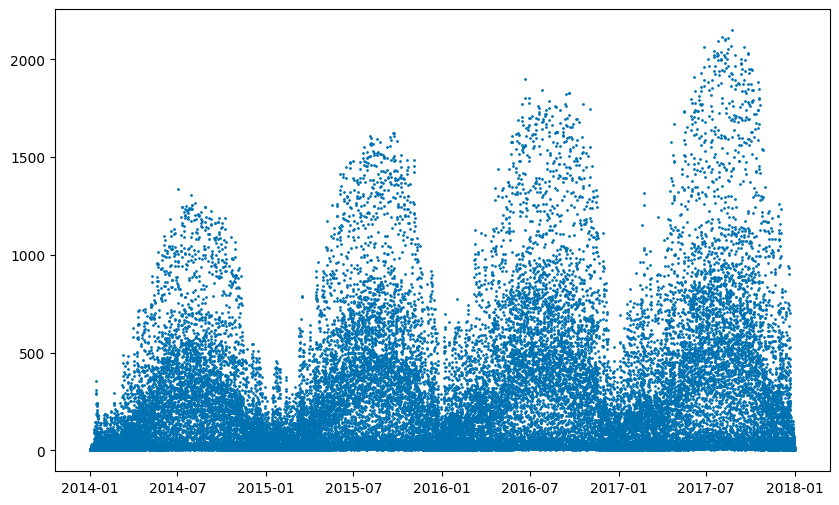

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], s=1, c='#0072B2')
plt.show()

In [ ]:
# 런타임 1분 미만
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365 * 24, freq='h')

DEBUG:cmdstanpy:input tempfile: /tmp/tmpp6fl74cb/44egmkog.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp6fl74cb/zyxq9aom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30786', 'data', 'file=/tmp/tmpp6fl74cb/44egmkog.json', 'init=/tmp/tmpp6fl74cb/zyxq9aom.json', 'output', 'file=/tmp/tmpp6fl74cb/prophet_modelme1s3mhq/prophet_model-20250706113547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:35:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:36:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


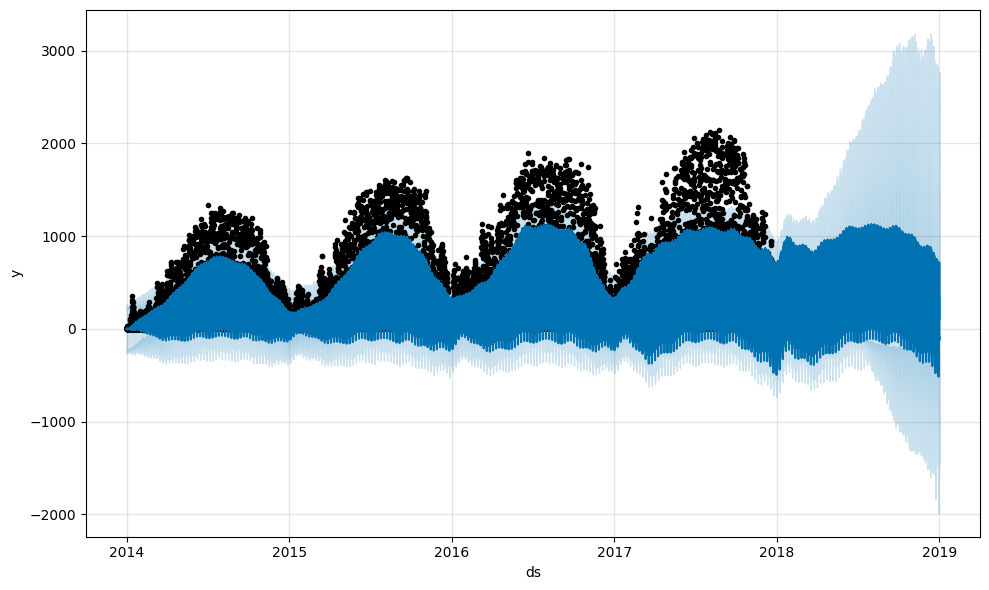

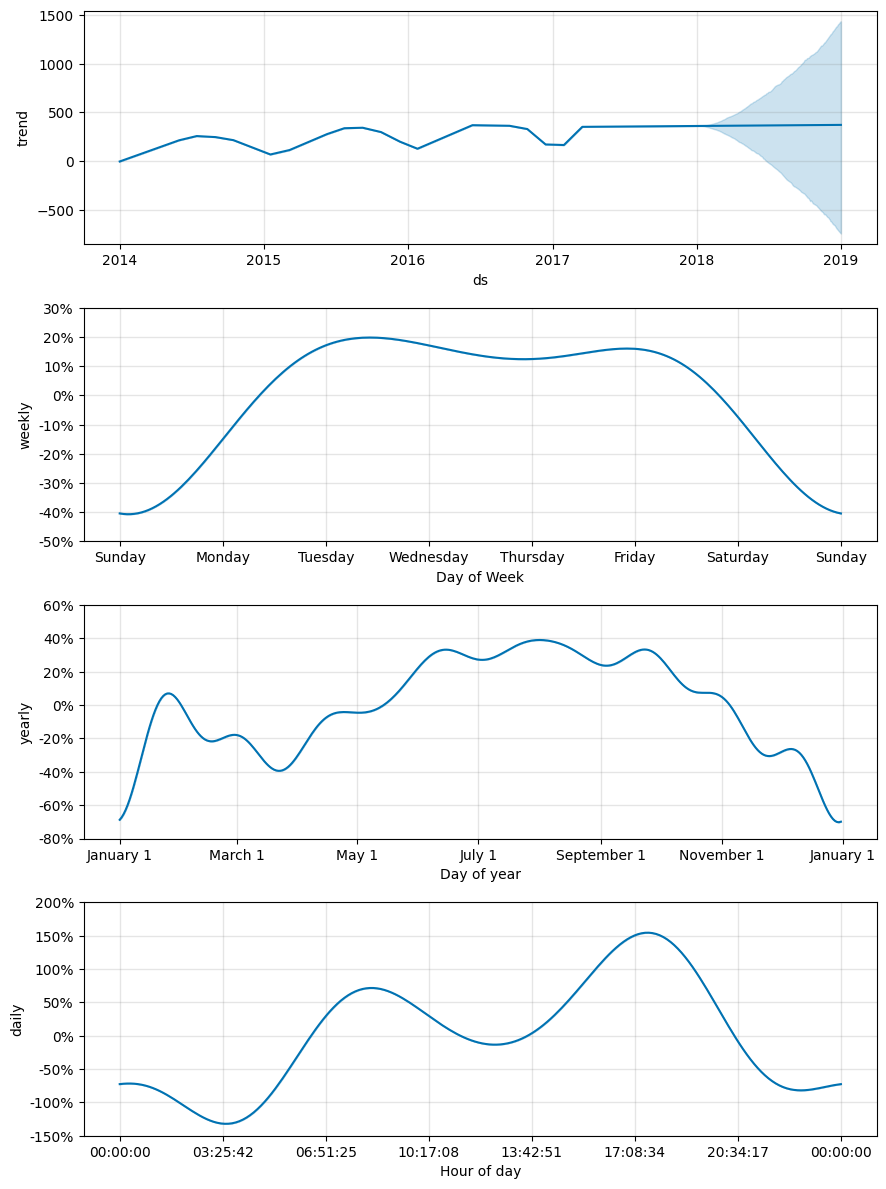

In [ ]:
forecast = model.predict(future)

fig = model.plot(forecast)
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

## 규칙적인 누락 구간gap)을 가진 데이터 사용

In [ ]:
df = df[(df['ds'].dt.hour >= 8) & (df['ds'].dt.hour < 18)]

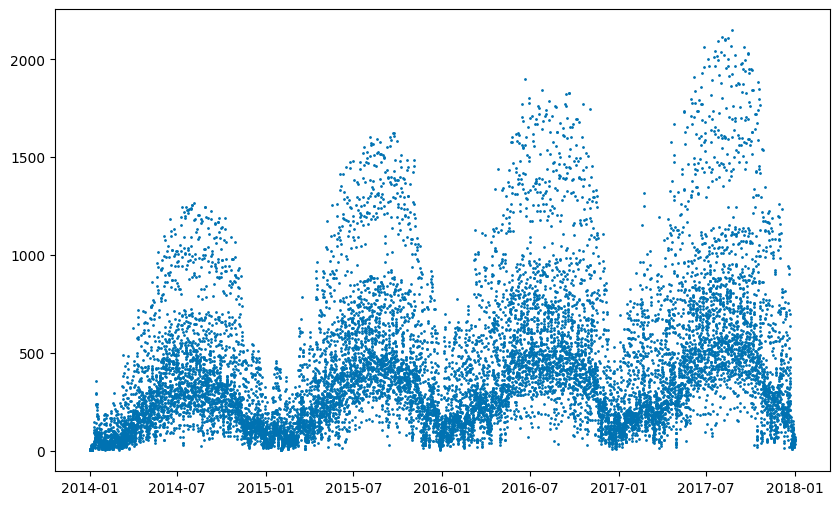

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], s=1, c='#0072B2')
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpp6fl74cb/8_06zhfm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp6fl74cb/4r7ww2fi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30625', 'data', 'file=/tmp/tmpp6fl74cb/8_06zhfm.json', 'init=/tmp/tmpp6fl74cb/4r7ww2fi.json', 'output', 'file=/tmp/tmpp6fl74cb/prophet_modelmfvjdfhb/prophet_model-20250706113725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:37:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:37:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


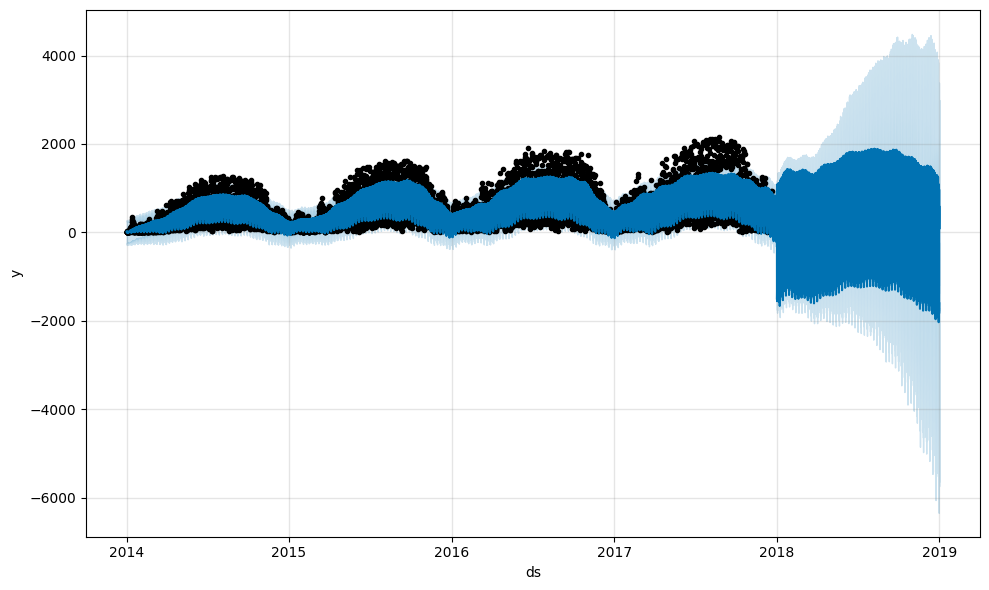

In [ ]:
# 런타임 30초
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365 * 24, freq='h')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

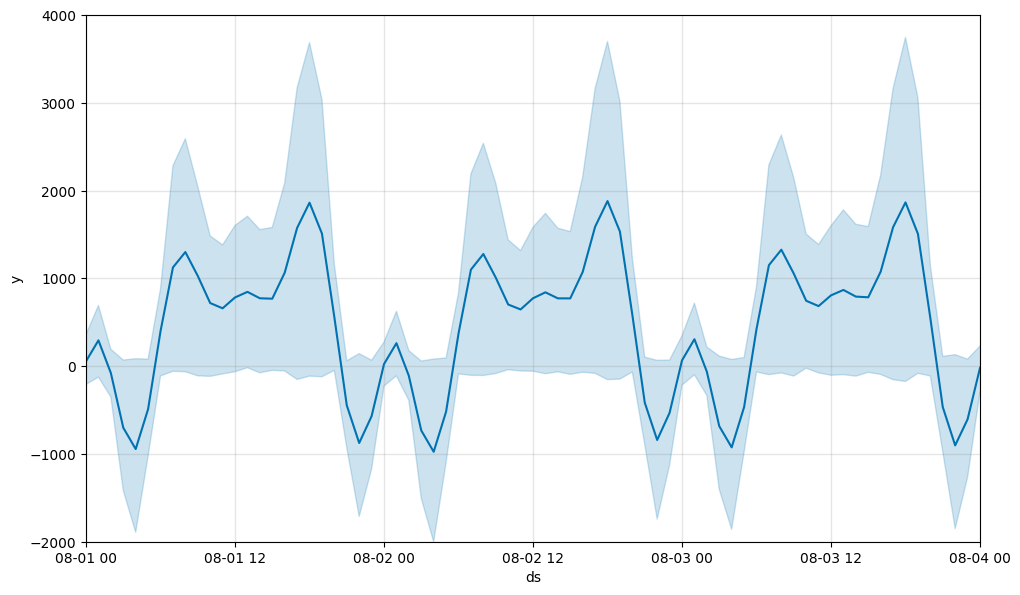

In [ ]:
fig = model.plot(forecast)
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show()

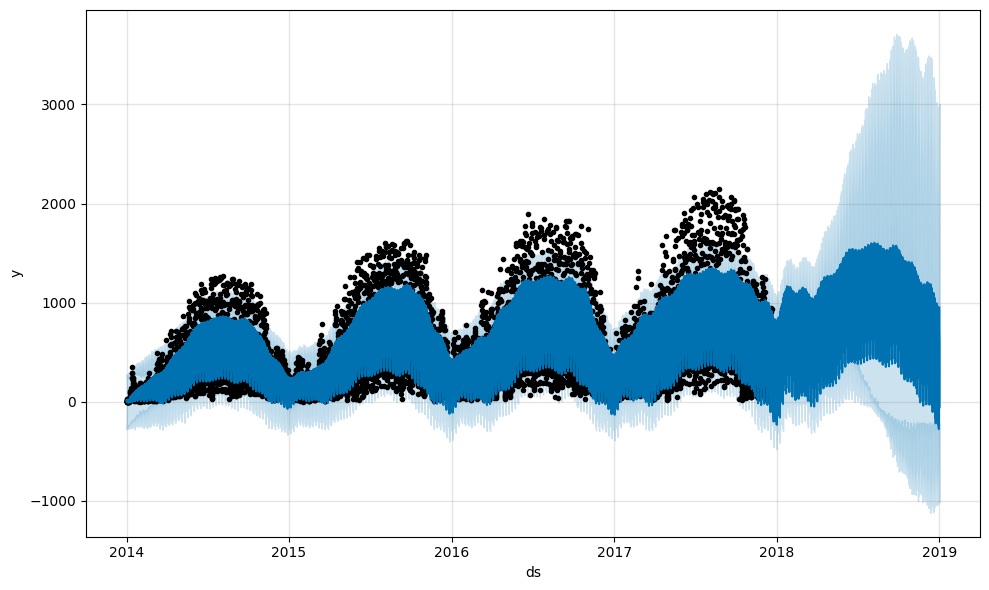

In [ ]:
future2 = future[(future['ds'].dt.hour >= 8) &
                 (future['ds'].dt.hour < 18)]
forecast2 = model.predict(future2)
fig = model.plot(forecast2)
plt.show()

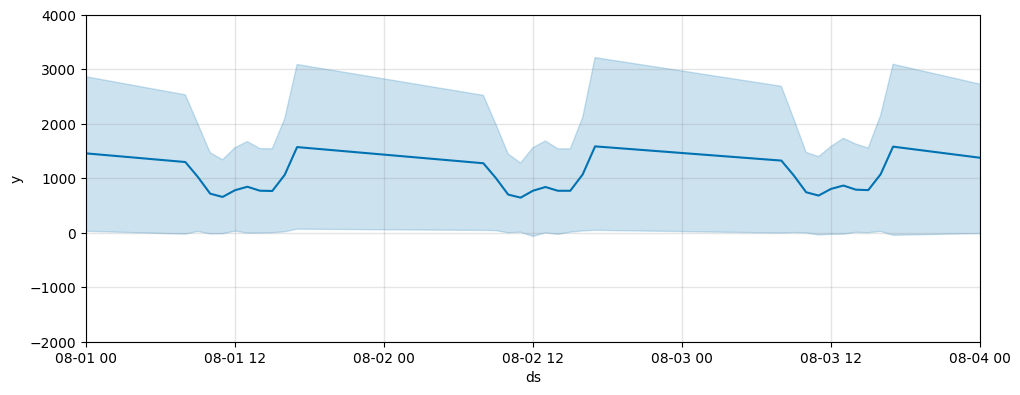

In [ ]:
fig = model.plot(forecast2, figsize=(10, 4))
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show()

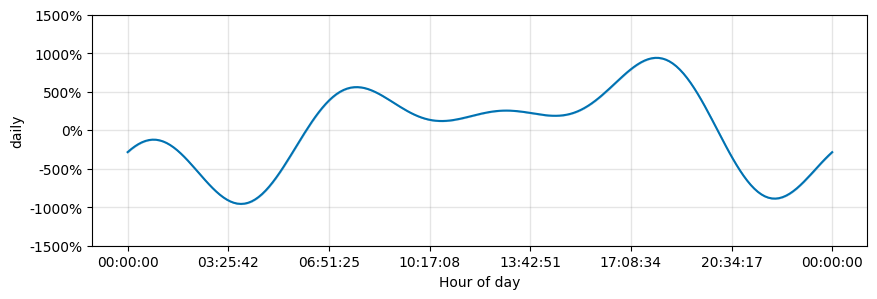

In [ ]:
from prophet.plot import plot_seasonality
plot_seasonality(model, 'daily', figsize=(10, 3))
plt.show()